# ML - Salary estimation using K-NEAREST NEIGHBOUR

1. Finding the problem - > PRedicting wheather applicant got salary above 50K or not from previous company - HR
2. collecting Dataset - > Age, Education,capital gain,hoursper week( 4 inputs), income -> 1 output
3. Load & summerize the data sets
4. Mapping Data from text to Binary numbers ( income column)
5. Segragate the date in to X and y depending on independent and dependent variable,
6. Splitting dataset in to train and test
7. Feature scalling to mainitain the scare of futute to avaoid higher weightage on single feature, to avoiding biasing
         Can be achieved by Normalization
                            Standardization
8. Algorithm - K-NEAREST NEIGHBOUR - >Classifier -> based on minkonwski distance matrix -> Euclidean =2 or Manhattan = 1 distance
9. Finding the best k value - > get least mean error
10. Training -> training the model with preprocessed dataset
11. Validation -> using confusion matrix
12. Prediction -> observe how the model is performing in new data.


## 3. Load and Summerize the data sets

In [37]:
import pandas as pd
import numpy as np


In [38]:
dataset = pd.read_csv("salary.csv")

In [39]:
dataset.shape

(32561, 5)

In [40]:
dataset.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
5,34,9,0,45,<=50K
6,38,6,0,40,<=50K
7,74,16,0,20,>50K
8,68,9,0,40,<=50K
9,41,10,0,60,>50K


In [41]:
# from google.colab import files
# h = files.upload()

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


## 4. Mapping Data from text to Binary numbers ( income column)

In [43]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
dataset.head(20)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
5,34,9,0,45,0
6,38,6,0,40,0
7,74,16,0,20,1
8,68,9,0,40,0
9,41,10,0,60,1


## 5. Segragate the date in to X and y depending on independent and dependent variable

In [45]:
x = dataset.iloc[:,:-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [46]:
y = dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0])

## 6. Splitting dataset in to train and test

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25, random_state = 0)

## 7.  Feature scaling

    we scale our data to make all the features contribute equally to the result
    Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data
    Transform - Transform method is transforming all the features using the respective mean and variance, 
    We want our test data to be a completely new and a surprise set for our model

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 8. Algorithm - K-NEAREST NEIGHBOUR - >Classifier -> based on minkonwski distance matrix -> Euclidean =2 or Manhattan = 1 distance

## Finding the best k value - > get least mean error

Text(0, 0.5, 'Mean Error')

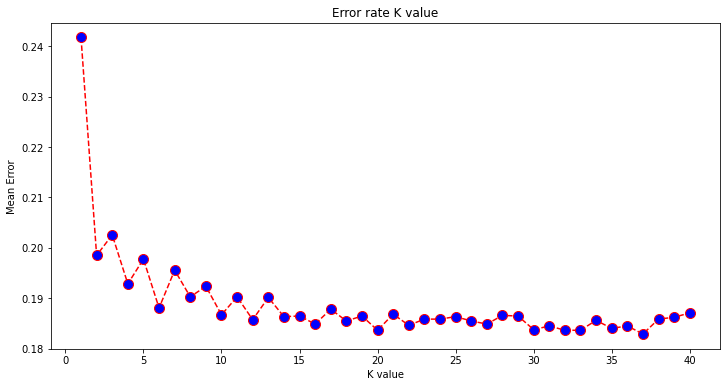

In [55]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# calculating error for K values between 1 and 40

for i in range(1,40+1):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize =(12,6))
plt.plot(range(1,41),error,color = 'red',linestyle = 'dashed',marker ='o',
        markerfacecolor = 'blue',markersize =10)
plt.title('Error rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')


## Training

In [75]:
model = KNeighborsClassifier(n_neighbors= 37, metric= 'minkowski', p = 2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=37)

## Predicting the salary 

In [76]:
age = int(input('Enter age :'))
edu = int(input('Enter Education :'))
cg = int(input('Capital Gain :'))
wh = int(input('Working hours per week  :'))

newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))

if result:
    print("Employee might got salary above 50k")
else:
    print("Employee might not got salary above 50k")


Enter age :29
Enter Education :7
Capital Gain :0
Working hours per week  :42
Employee might not got salary above 50k


## Predicting for all test data

In [77]:
y_pred = model.predict(x_test)

print(np.concatenate( (y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Evaluating Model , confusion model and accurary score

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5858  335]
 [1154  794]]
Accuracy of the Model: 81.70986365311387%
